In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/sample_submission.csv
/kaggle/input/test.csv.zip
/kaggle/input/train.csv.zip
/kaggle/input/labels.csv.zip
/kaggle/input/train.csv
/kaggle/input/test.csv
/kaggle/input/labels.csv
/kaggle/input/description.md
/kaggle/input/GCP-Coupons-Instructions.rtf
/kaggle/input/sample_submission.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/labels.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv
/kaggle/input/new-york-city-taxi-fare-prediction/labels.csv
/kaggle/input/new-york-city-taxi-fare-prediction/description.md
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv.zip


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
train_df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv',nrows = 1000000)
test_df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')


In [5]:
train_df


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
999995,2014-09-13 21:44:38.0000001,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999996,2010-09-20 14:50:37.0000002,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1


In [6]:
test_df


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-10-01 21:26:11.0000001,2010-10-01 21:26:11 UTC,-73.983130,40.761970,-73.994386,40.749236,1
1,2013-10-06 01:38:00.00000083,2013-10-06 01:38:00 UTC,-73.948505,40.753977,-73.808195,40.731952,2
2,2012-03-30 19:13:53.0000001,2012-03-30 19:13:53 UTC,-73.973964,40.791979,-73.979018,40.785544,1
3,2012-02-08 02:57:23.0000001,2012-02-08 02:57:23 UTC,-73.991478,40.738907,-73.907198,40.861572,2
4,2013-12-13 22:56:00.000000237,2013-12-13 22:56:00 UTC,-73.986281,40.740067,-73.933927,40.856781,2
...,...,...,...,...,...,...,...
9909,2010-12-02 01:44:39.0000002,2010-12-02 01:44:39 UTC,-73.992667,40.734183,-73.995432,40.739215,4
9910,2010-06-07 16:17:38.0000003,2010-06-07 16:17:38 UTC,0.000000,0.000000,0.000000,0.000000,1
9911,2013-11-01 08:37:36.0000003,2013-11-01 08:37:36 UTC,-73.990315,40.746236,-73.991841,40.733516,1
9912,2011-05-03 10:14:00.000000123,2011-05-03 10:14:00 UTC,-73.956110,40.787588,-73.971877,40.765808,1


In [7]:
train_df.columns


Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [8]:
test_df.columns


Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [9]:
train_df.isnull().sum().sort_values(ascending=False)


dropoff_longitude    10
dropoff_latitude     10
key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
passenger_count       0
dtype: int64

In [10]:
test_df.isnull().sum().sort_values(ascending=False)


key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
a = train_df[train_df["dropoff_longitude"].isnull()|train_df["dropoff_latitude"].isnull()]
print(a)


                                 key  fare_amount          pickup_datetime  \
120227  2012-12-11 12:57:00.00000013        12.50  2012-12-11 12:57:00 UTC   
245696   2013-03-21 18:07:07.0000001        86.50  2013-03-21 18:07:07 UTC   
340533  2012-12-11 12:50:52.00000010        27.50  2012-12-11 12:50:52 UTC   
428108   2011-09-08 09:12:52.0000001        11.80  2011-09-08 09:12:52 UTC   
471472   2012-12-11 12:34:20.0000006         7.80  2012-12-11 12:34:20 UTC   
524834   2011-09-25 23:01:12.0000005        14.76  2011-09-25 23:01:12 UTC   
574023   2013-11-04 20:59:15.0000001        10.20  2013-11-04 20:59:15 UTC   
580338   2012-12-11 12:00:53.0000002        21.00  2012-12-11 12:00:53 UTC   
794694   2013-11-04 20:07:59.0000006         7.20  2013-11-04 20:07:59 UTC   
895400   2011-06-20 11:34:44.0000001        40.00  2011-06-20 11:34:44 UTC   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
120227        -73.992760        40.743098                NaN   
245696       

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [12]:
train_df.drop(a.index,axis=0, inplace=True)


In [13]:
train_df.isnull().sum().sort_values(ascending=False)


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [14]:
 train_df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [15]:
test_df.describe()


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-72.365437,39.854075,-72.355298,39.849902,1.701735
std,10.901230,6.325354,10.928248,6.338538,1.328327
min,-74.178068,-74.000425,-75.437730,-74.009507,0.000000
25%,-73.992274,40.734688,-73.991365,40.733664,1.000000
50%,-73.981978,40.752504,-73.980220,40.753209,1.000000
75%,-73.966718,40.767114,-73.963598,40.768143,2.000000
max,40.790297,41.366138,40.800715,41.056380,6.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare_amount', ylabel='Count'>

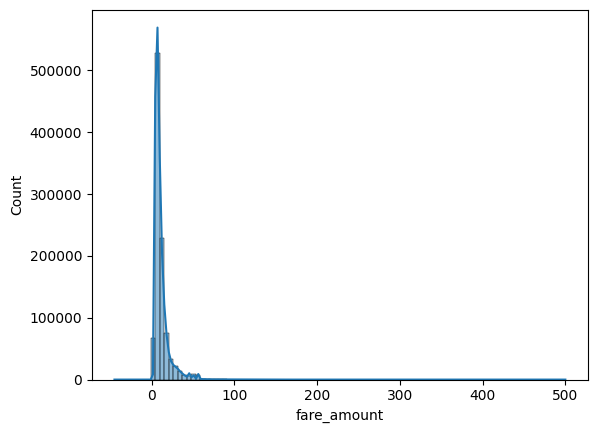

In [16]:
sns.histplot(
data = train_df, x = "fare_amount", kde = True, bins = 100)


<Axes: ylabel='fare_amount'>

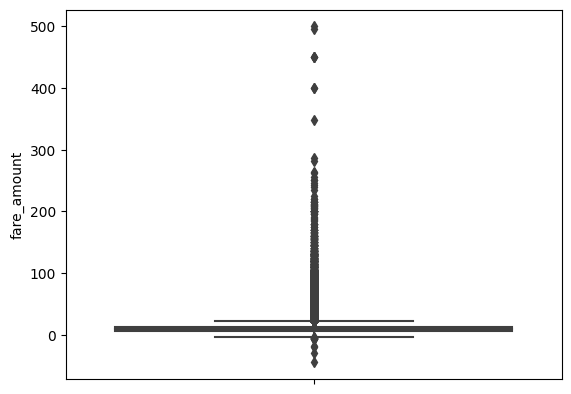

In [17]:
sns.boxplot(
data = train_df, y = "fare_amount")


In [18]:
train_df['passenger_count'].describe()


count    999990.000000
mean          1.684941
std           1.323907
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 1000000.0)

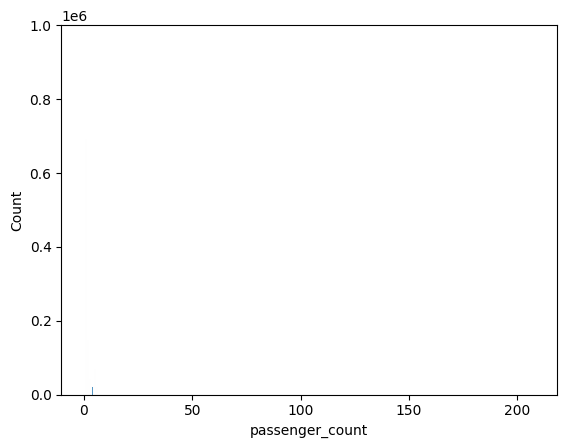

In [19]:
sns.histplot(
data = train_df, x = "passenger_count")
plt.ylim(0,1000000)


In [20]:
train_df = train_df[(train_df["fare_amount"] >= 2.5) & (train_df["fare_amount"]  100)]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2097761496.py, line 1)

In [21]:
train_df["fare_amount"].describe()


count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 150000.0)

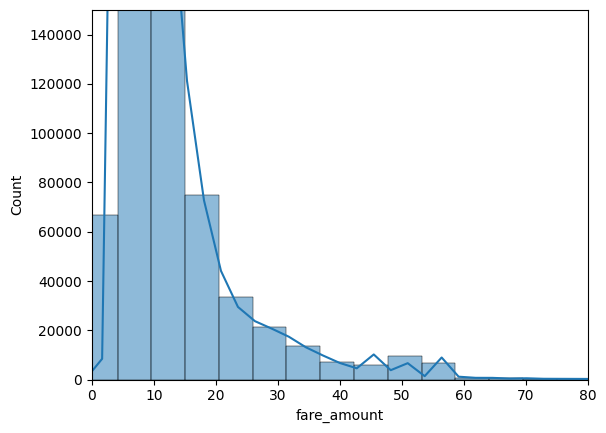

In [22]:
sns.histplot(
data = train_df, x = "fare_amount", kde = True, bins = 100 )
plt.xlim(0,80)
plt.ylim(0,150000)


<Axes: ylabel='fare_amount'>

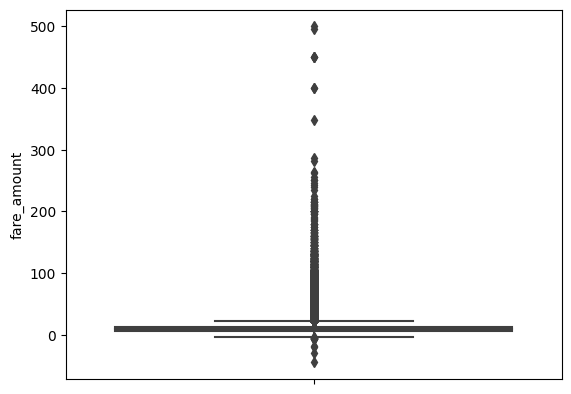

In [23]:
sns.boxplot(
data = train_df, y = "fare_amount")


In [24]:
train_df = train_df[(train_df["passenger_count"]  6) & (train_df["passenger_count"] >= 1)]
sns.histplot(
data = train_df, x = "passenger_count")
plt.ylim(0,1000000)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2348098167.py, line 1)

In [25]:
train_df = train_df[(train_df["pickup_longitude"]  -73.0) & (train_df["pickup_longitude"] >= -74.5)]
train_df = train_df[(train_df["pickup_latitude"] >= 40.5) & (train_df["pickup_latitude"]  42)]
train_df = train_df[(train_df["dropoff_longitude"]  -73.0) & (train_df["dropoff_longitude"] >= -74.5)]
train_df = train_df[(train_df["dropoff_latitude"] >= 40.5) & (train_df["dropoff_latitude"]  42)]
## 42~40.5,-74.5~-73


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2838870654.py, line 2)

In [26]:
train_df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [27]:
train_df


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
999995,2014-09-13 21:44:38.0000001,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999996,2010-09-20 14:50:37.0000002,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1


In [28]:
train_df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [29]:
train_df.drop(['key','pickup_datetime'], axis = 1, inplace=True)
test_df.drop(['key','pickup_datetime'], axis = 1, inplace=True)


In [30]:
train_df.columns


Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [31]:
test_df.columns


Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [32]:
from geopy.distance import geodesic
def get_distance_km(lat1, lon1, lat2, lon2):
    p_point = (lat1, lon1)
    d_point = (lat2, lon2)
    distance_km = geodesic(p_point, d_point).km
    return distance_km


In [33]:
train_len = len(train_df)
print(train_len)


999990


In [34]:
df = pd.concat([train_df,test_df], axis=0)


In [35]:
print(len(df))


1009904


In [36]:
distances_km = []
for i in range(len(df)):
    distance = get_distance_km(df.iloc[i,df.columns.get_loc("pickup_latitude")],df.iloc[i,df.columns.get_loc("pickup_longitude")],df.iloc[i,df.columns.get_loc("dropoff_latitude")],df.iloc[i,df.columns.get_loc("dropoff_longitude")])
    distances_km.append(distance)


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


ValueError: Latitude must be in the [-90; 90] range.

In [37]:
print(distances_km[:20])


[1.029600743500156, 8.443441363128793, 1.3891321598440807, 2.7957896578148556, 1.9983378357758064, 3.78798006880777, 1.5544462802770207, 4.159930252746948, 1.2555073729326156, 2.847028411074056, 1.3776370664461037, 0.0, 0.7195983130843498, 2.016896545314358, 1.669479180666655, 0.0, 2.606419815183223, 1.5130419624073788, 0.9241914857266301, 0.39866461235235773]


In [38]:
import statistics
mean = statistics.mean(distances_km)
print(mean)


12.002692512381795


In [39]:
df["distance"] = distances_km


ValueError: Length of values (5686) does not match length of index (1009904)

In [40]:
df


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...
9909,NaN,-73.992667,40.734183,-73.995432,40.739215,4
9910,NaN,0.000000,0.000000,0.000000,0.000000,1
9911,NaN,-73.990315,40.746236,-73.991841,40.733516,1
9912,NaN,-73.956110,40.787588,-73.971877,40.765808,1


In [41]:
train = df[0:train_len]
test = df[train_len:]


In [42]:
train.isnull().sum().sort_values(ascending=False)


fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [43]:
test.isnull().sum().sort_values(ascending=False)


fare_amount          9914
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
dtype: int64

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [45]:
train_X = train.drop("fare_amount",axis=1).values
train_y = train["fare_amount"].values
test = test.drop("fare_amount",axis=1).values
train_x, test_x, train_y, test_y = train_test_split(train_X,train_y,test_size=0.3,random_state=0)


In [46]:
model = LinearRegression()
model.fit(train_x,train_y)
test_x_predict = model.predict(test_x)


In [47]:
print("score:"+str(np.sqrt(mean_squared_error(test_y,test_x_predict))))


score:9.777253350786243


In [48]:
sub = pd.read_csv("/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv")
sub["fare_amount"] = model.predict(test)


In [49]:
sub.to_csv("submission.csv",index=False)


In [50]:
sub


,key,fare_amount
0,2010-10-01 21:26:11.0000001,11.268929
1,2013-10-06 01:38:00.00000083,11.364510
2,2012-03-30 19:13:53.0000001,11.268804
3,2012-02-08 02:57:23.0000001,11.363397
4,2013-12-13 22:56:00.000000237,11.363251
...,...,...
9909,2010-12-02 01:44:39.0000002,11.551978
9910,2010-06-07 16:17:38.0000003,12.044464
9911,2013-11-01 08:37:36.0000003,11.269045
9912,2011-05-03 10:14:00.000000123,11.268950
